In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import numpy as np
import pickle


from pulsars import Pulsars, c, e_charge, e_mass, h
import speiser_fun_cyl as sfc


In [2]:
#Ανάγνωση του λεξικού παραμέτρων
dir_path = 'orbits_100'
with open('{}/par_dic.txt'.format(dir_path), 'rb') as par_dic:
    pdic = pickle.loads(par_dic.read())

In [3]:
#Έκχώρηση των παραμέτρων της προσωμοίωσης
k = pdic['multiplicity']
name = pdic['pulsar_name']
pulsar = Pulsars(k)[name]

gamma1 = 1.
B_0 = pdic['char magn field (Blc)']
omegaB = (e_charge*B_0/(e_mass*c))    #γυροσυχνότητα
Rlc = pdic['Radius of lc']
Delta = pdic['diss zone length']
# q = pdic['charge sign']

# gamma0 = np.array([1000., 1.])   #αρχικός παράγοντας Lorentz
# init_pos = np.array([0.5])

gamma0 = pdic['initial lorentz factors']
init_pos = pdic['initial injection positions']

delta_init = pdic['diss zone width']    #πάχος του φύλλου ρεύματος, αδιάστατο, σε μονάδες [c/ωΒ]

T = pdic['runtime']
N = pdic['number of t points']
t = np.linspace(0.0, T*Delta, N)

pop = gamma0**(-1.)



<IPython.core.display.Javascript object>


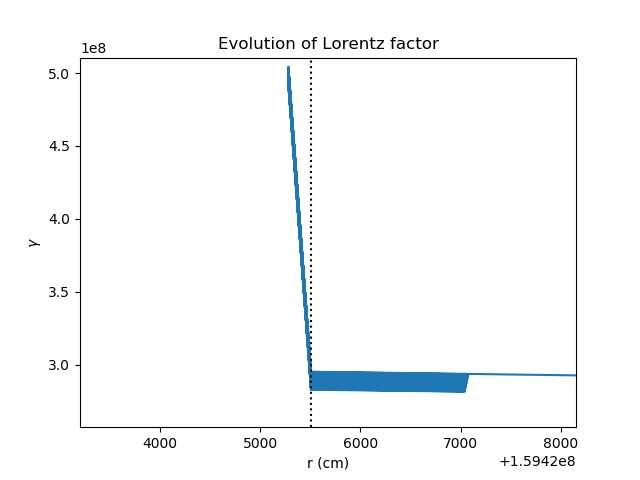

<IPython.core.display.Javascript object>


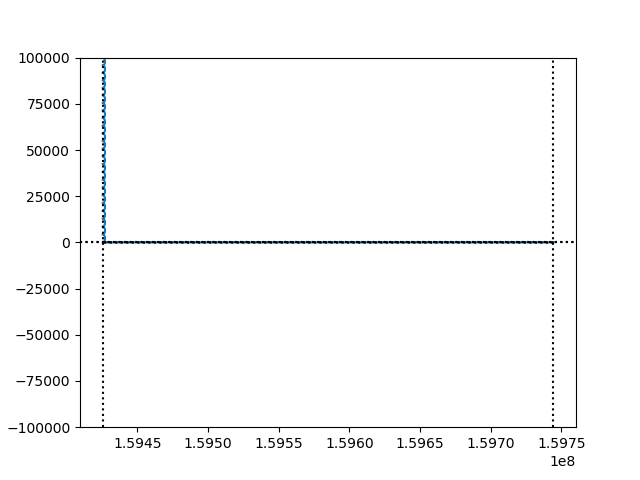

<IPython.core.display.Javascript object>


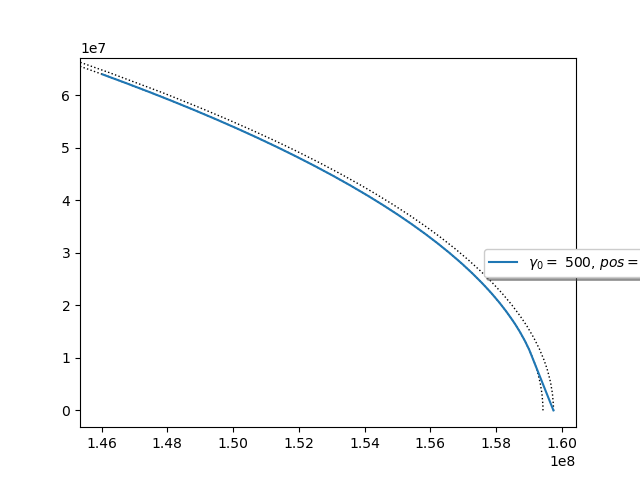

In [4]:
%matplotlib notebook




fig1, ax1 = plt.subplots()

fig2, ax2 = plt.subplots() 

fig3, ax3 = plt.subplots()
for q in [-1]:
    if q == +1:
        charge = 'pos'
        linestyle = '-'
    else:
        charge = 'el'
        linestyle = '-'
        
    for w in range(len(init_pos)):

        vec = np.load('{}/cyl_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
        r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
        for i in range(0, len(gamma0)-1):
                ax1.plot(r[i]*c/omegaB, sfc.gamma(ur[i], uphi[i], uz_cyl[i]), 
                         label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])),
                        linestyle = linestyle)
    delta1 = np.zeros(len(r[0]))
    for j in range(len(r[0])):
        delta1[j] = sfc.delta(r[0][j], Rlc, Delta, delta_init)
        if r[0][j] == Rlc + Delta:
            delta1[j] = np.NaN
    ax1.set(xlabel = 'r (cm)', ylabel = '$\gamma$', title = 'Evolution of Lorentz factor', 
            xlim = [(Rlc - Delta)*c/omegaB, (Rlc + 20*Delta)*c/omegaB], ylim = [0, 10**9])
    ax1.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k')
    ax1.axvline(x = (Rlc + Delta)*c/omegaB, linestyle = ':', color = 'k')
#         ax1.legend(loc='best', ncol=3, fancybox=True, shadow=True, )#bbox_to_anchor=(0.6, 0.5))
        
        #     fig1.savefig('γ(r)')


    for w in range(len(init_pos)):
        vec = np.load('{}/cyl_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
        r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']    
        for i in range(0, len(gamma0)-1):
#             if  all(j < Rlc + 100*Delta for j in r[i]):
                ax2.plot(r[i]*c/omegaB, z_cyl[i]*c/omegaB, 
                         label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])),
                        linestyle = linestyle, zorder = 0)

#         axins = zoomed_inset_axes(ax2, 5, loc=1)
#         axins.plot(r[i]*c/omegaB, z_cyl[i]*c/omegaB)
#         x1, x2, y1, y2= 0.99999*Rlc*c/omegaB, 1.00001*Rlc*c/omegaB, -0.3*delta*c/omegaB, 0.3*delta*c/omegaB
#         axins.set(xlim = [x1,x2], ylim = [y1,y2])
#         axins.set_xticklabels = ''
#         mark_inset(ax2, axins, loc1=2, loc2=4, fc="none", ec="0.5")
        
    ax2.axhline(y = delta1[-1]*c/omegaB, linestyle = ':', color = 'k')
    ax2.axhline(y = -delta1[-1]*c/omegaB, linestyle = ':', color = 'k')

    ax2.plot(r[0]*c/omegaB, delta1*c/omegaB, color = 'k', linestyle = ':', alpha = 1., zorder = 10)
    ax2.plot(r[0]*c/omegaB, -delta1*c/omegaB, color = 'k', linestyle = ':', alpha = 1., zorder = 10)
    ax2.axvline(x = Rlc*c/omegaB, linestyle = ':', color = 'k')
    ax2.axvline(x = (Rlc + Delta)*c/omegaB, linestyle = ':', color = 'k')
    ax2.set_ylim(ymin = -10**5, ymax = 10**5)

#     ax2.legend(loc='center left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(0.8, 0.5))
    #     fig2.savefig('epipedo_r-z')

    
    for w in range(len(init_pos)):
        vec = np.load('{}/cyl_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
        r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
        for i in range(0, len(gamma0)-1):
#             if  all(j < Rlc + 100*Delta for j in r[i]):
                plot1 = ax3.plot(r[i]*np.cos(phi[i])*c/omegaB, r[i]*np.sin(phi[i])*c/omegaB, 
                                 label = '$\gamma_0 =$ {}, $pos =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])),
                                linestyle = linestyle)
    # #     plot1 = ax3.plot(r1[i]*np.cos(phi1[i])*c/omegaB, r1[i]*np.sin(phi1[i])*c/omegaB, 
    # #                      label = '$\gamma_0$ = {}'.format(int(gamma0[i])))
    # #     plot1 = ax3.plot(r2[i]*np.cos(phi2[i])*c/omegaB, r2[i]*np.sin(phi2[i])*c/omegaB, 
    # #                      label = '$\gamma_0$ = {}'.format(int(gamma0[i])))

#         ax3.set(xlabel = '$rcos\phi \ (cm)$', ylabel = '$rsin\phi \ (cm)$', title = '$Orbit \ in \ r-\phi \ plane$', aspect = 'auto', 
#                xlim = [1.57E+8, 1.61E+8], ylim = [-0.1E+7, 3.5E+7])


ax3.legend(loc='best', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(0.8, 0.5))

radius1 = mpatches.Arc((0.0, 0.0), 2*Rlc*c/omegaB, 2*Rlc*c/omegaB, theta1 = 0, theta2 = 90, color = 'k', ls = ':',
                       linewidth=1, fill=False)
radius2 = mpatches.Arc((0.0, 0.0), 2*(Rlc + Delta)*c/omegaB, 2*(Rlc + Delta)*c/omegaB, theta1 = 0, theta2 = 90,
                       color = 'k', ls = ':', linewidth=1, fill=False)
ax3.add_patch(radius1)
ax3.add_patch(radius2)
    
# fig5, ax5 = plt.subplots()
# for w in range(len(init_pos)):
#     vec = np.load('cyl_{}.npz'.format(int(100*init_pos[w])))
#     r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
#     for i in range(0, len(gamma0) - 1):
#         ax5.plot(t, uphi[i]*sfc.Bz_cyl(r[i], Rlc, Delta)/(uz_cyl[i]*sfc.B_phi(r[i], z_cyl[i], Rlc, Delta, delta)))

# fig3.savefig('epipedo_rcosφ-rsinφ')

plt.show()

<IPython.core.display.Javascript object>


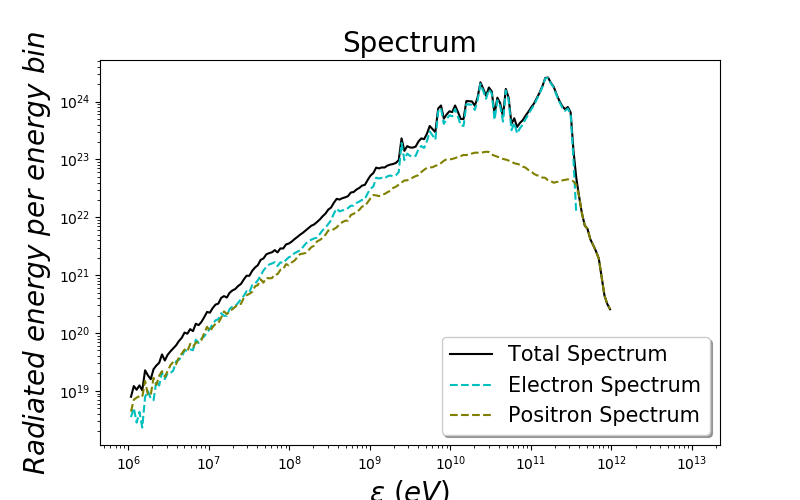

In [5]:
%matplotlib notebook
total = np.zeros(201)
total_el = np.zeros(201)
total_pos = np.zeros(201)
lines = []
labels = []

dt = t[100]-t[99]

A = k*B_0*c*(Delta*c/omegaB)/(e_charge*len(gamma0)*len(init_pos)*N)

# pop = np.array([10., 5., 2.])
# init_pos = [0.125, 0.25, 0.375]
# dir_path = 'data1'
fig4, ax4 = plt.subplots(figsize  = (8, 5))

for q in [-1,1]:
    
    if q == +1:
        charge = 'pos'
        color_in = 'b'
    else:
        charge = 'el'
        color_in = 'r'
#     for w in [0]:
    for w in range(len(init_pos)):
        if  w != 7:
            spec = np.load('{}/spectrum_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
            (en, ph_num, ph_num_out, ph_num_out2, ph_num_sep, ph_en, 
             ph_en_out, ph_en_out2, ph_en_sep, ph_num_tot, ph_en_tot) = (spec['en'], 
                                                                         spec['ph_num'], 
                                                                         spec['ph_num_out'], 
                                                                         spec['ph_num_out2'],
                                                                         spec['ph_num_sep'],
                                                                         spec['ph_en'], 
                                                                         spec['ph_en_out'],
                                                                         spec['ph_en_out2'],
                                                                         spec['ph_en_sep'],
                                                                         spec['ph_num_tot'],
                                                                         spec['ph_en_tot'])

        colors = iter(plt.cm.Accent(np.linspace(0, 1, len(gamma0))))
        col = next(colors)
#         for i in [8]:
#         for i in range(len(gamma0)-1):
#             if not (w == 7):
#                 col = next(colors)
#                 ax4.plot(en, A*ph_en[i], c = color_in,
#                             label = '$\gamma_0 =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
#                 ax4.plot(en, A*ph_en_out[i], c = 'g',
#                             label = '$\gamma_0 =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
#                 ax4.plot(en, A*ph_en_out2[i], c = 'y',
#                             label = '$\gamma_0 =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
#                 ax4.plot(en, A*ph_en_sep[i], c = 'm',
#                          label = '$\gamma_0 =$ {}'.format(int(gamma0[i]), int(100*init_pos[w])))
          


#         if w != 7 and w != 6:
#             line, = ax4.plot(en, ph_en_tot)
#             lines.append(line)
#             label = 'position = $R_{{lc}} - $ {pos} *$\Delta$'.format(pos = int(100*init_pos[w])/100)
#             labels.append(label)
        if charge == 'el':
            total_el += ph_en_tot
        else:
            total_pos += ph_en_tot
        total = total_el + total_pos
#         leg1 = ax4.legend(handles = [lines[w]  for w in range(0, len(labels)-1) ], 
#                       labels = [labels[w]  for w in range(0, len(labels)-1) ],
#                       title = 'total emmited power',
#                       loc = 2, ncol = 2, fancybox=True, shadow=True, fontsize = 8)
#         #     ax4.scatter(en_rlc, ph_en_rlc[i], label = '$\gamma_0$ = {}, rlc'.format(int(gamma0[i])))
        
#     ax4.legend(loc = 'best', fancybox=True, shadow=True, fontsize = 8 )
#     lines.append(line)
#     labels.append('all positions')

#     ax4.plot(en_rlc, ph_en_tot_rlc, label = 'total photon energy, rlc', color = 'k')
    

#     leg2 = ax4.legend(loc=2, ncol=1, fancybox=True, shadow=True, fontsize = 8 )
#     marker1,  = ax4.plot([], [], marker = 'o', color = 'k', markersize = 10)
#     marker2,  = ax4.plot([], [], marker = '*', color = 'k', markersize = 10)
#     leg3 = ax4.legend([marker1, marker2], ['inside', 'outside'], loc = 4, fontsize = 8, fancybox=True, shadow=True )
#     ax4.add_artist(leg1)
#     ax4.add_artist(leg2)
ax4.set_xlabel('$ \epsilon \ (eV)$', fontsize = 20)
ax4.set_ylabel('$Radiated \ energy \ per \ energy \ bin$', fontsize = 20)
ax4.set_title('Spectrum', fontsize = 20)
ax4.set_xscale(value = 'log', nonposx = 'mask')
ax4.set_yscale(value = 'log', nonposy = 'mask')
# ax4.set_ylim(1.e+22, 1.e+25)
# ax4.set_xlim(xmin = 10**8, xmax = 2*10**12)


line, = ax4.plot(en, A*total, label = 'Total Spectrum', c = 'k')
line, = ax4.plot(en, A*total_el, label = 'Electron Spectrum', ls = '--', c = 'c')
line, = ax4.plot(en, A*total_pos, label = 'Positron Spectrum', ls = '--', c = 'olive')

# ax4.set_ylim(22, 25)

# line, = ax4.plot(en, total*dt, label = 'Total Spectrum', c = 'g')
# line, = ax4.plot(en, total_el*dt, label = 'Electron Spectrum', ls = '--', c = 'r')
# line, = ax4.plot(en, total_pos*dt, label = 'Positron Spectrum', ls = '--', c = 'b')
ax4.legend(loc = 'best', fancybox=True, shadow=True, fontsize = 15 )

fig4.savefig('spectrum4.png')
plt.show()



In [6]:
# %matplotlib notebook
# fig3d = plt.figure()
# ax3d = plt.axes(projection='3d')

# for q in [-1]:
#     if q == +1:
#         charge = 'pos'
#     else:
#         charge = 'el'
#     for w in range(len(init_pos)):
#         vec = np.load('{}/cyl_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
#         r, ur, phi, uphi, z_cyl, uz_cyl = vec['r'], vec['ur'], vec['phi'], vec['uphi'], vec['z_cyl'], vec['uz_cyl']
        
#         for i in range(len(gamma0) - 1):
            
# #             if not (i == 0 and w == 0):
                
#             ax3d.plot3D(r[i]*np.cos(phi[i]), r[i]*np.sin(phi[i]), z_cyl[i])
            
#             ax3d.set(xlabel='x', ylabel='y', zlabel='z', )
#             rect = [0.18,0.18,0.25,0.25]
#             ax_inset1 = fig3d.add_axes(rect)
#             ax_inset1.plot(r[i]*c/omegaB,z_cyl[i]*c/omegaB,'r--'); ax_inset1.set_xlim(x.min(),x.max())
# plt.show()
            
            

In [7]:
num = 0.
for q in [-1,1]:
    for w in range(len(init_pos)):
        if  w != 7:
            spec = np.load('{}/spectrum_{}_{}.npz'.format(dir_path, int(100*init_pos[w]), charge))
            (en, ph_num, ph_num_out, ph_num_sep, ph_en, ph_en_out, ph_en_sep, ph_num_tot, ph_en_tot) = (spec['en'], 
                                                                                                        spec['ph_num'], 
                                                                                                        spec['ph_num_out'], 
#                                                                                                     , ph_num_out2
# , ph_en_out2    spec['ph_num_out2'],
                                                                                                        spec['ph_num_sep'],
                                                                                                        spec['ph_en'], 
                                                                                                        spec['ph_en_out'],
                                                                                                        spec['ph_en_sep'],
                                                                                                        spec['ph_num_tot'],
                                                                                                        spec['ph_en_tot'])   
            num += sum(ph_num_tot)
    
print(sum)

<built-in function sum>
